# Time Series Forecasting

## Contents

* To be updated once finalized

# 1 Import libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
import matplotlib
import matplotlib.pyplot as plt
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
import os
import warnings 

warnings.filterwarnings("ignore") 
plt.style.use('fivethirtyeight')

In [2]:
# Set matplot parameters

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [3]:
# create path

path = r"C:\Users\leobs\OneDrive\Desktop\LF_TS_Analysis"

In [4]:
# Import time series data frame
# Billboard Hot 100 songs from 2019-2023, how many songs Taylor
# Swift has on the Billboard Hot 100 with chart week as the date
# index

data =  pd.read_csv(os.path.join(path, '02 Manipulated data', 'ts_eras_timeseries_df.csv'), index_col = 0)

In [5]:
data.head()

,count_ts_songs
datetime,
2019-08-24,2
2019-08-31,3
2019-09-07,18
2019-09-14,6
2019-09-21,3


In [6]:
data.shape

(221, 1)

In [7]:
data.dtypes

count_ts_songs    int64
dtype: object

In [8]:
data.index = pd.to_datetime(data.index)

In [9]:
data.head()

,count_ts_songs
datetime,
2019-08-24,2
2019-08-31,3
2019-09-07,18
2019-09-14,6
2019-09-21,3


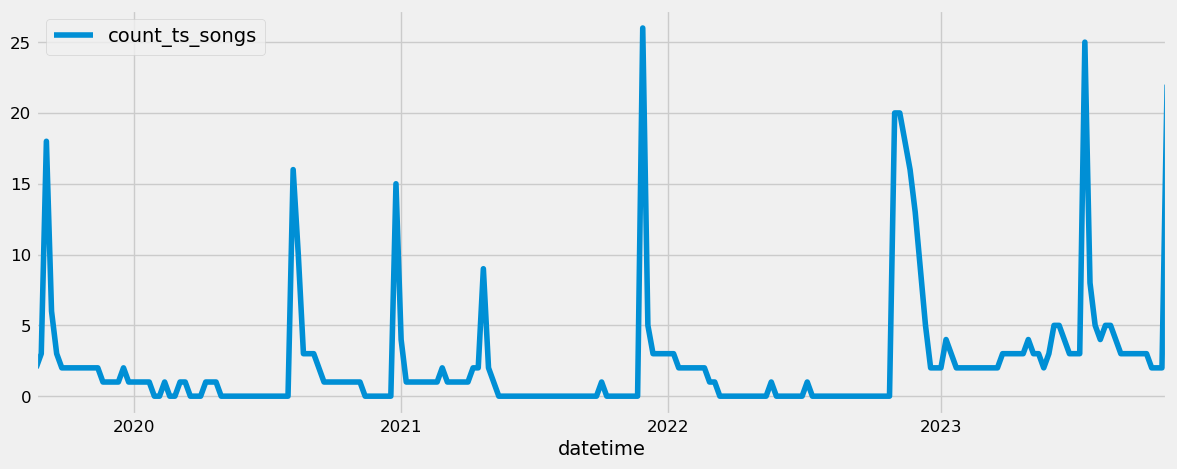

In [10]:
data.plot(figsize=(13, 5))
plt.show()

In [11]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 7

In [12]:
decomposition = sm.tsa.seasonal_decompose(data, model='additive')

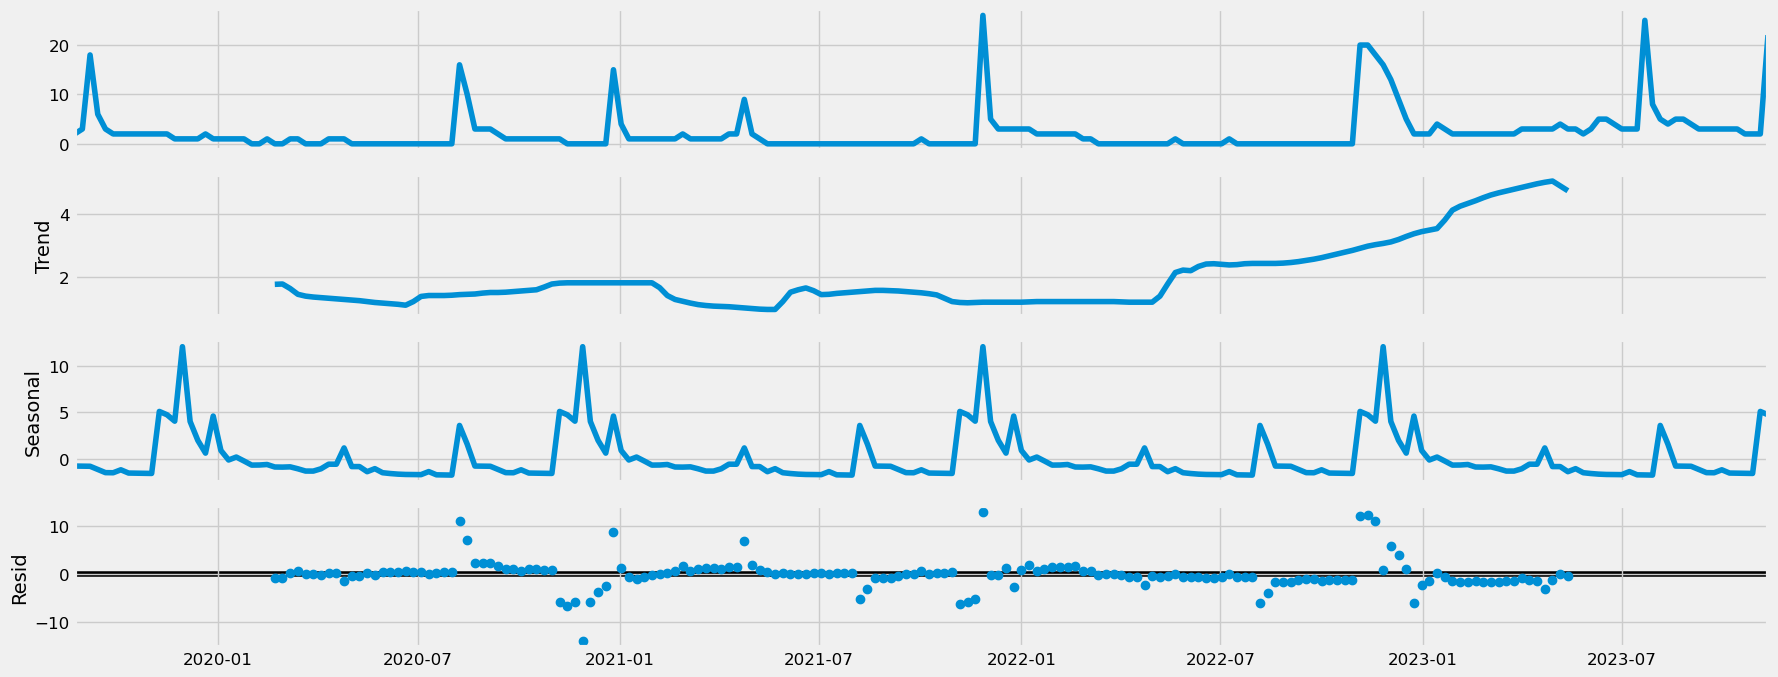

In [13]:
# Review decomposition

fig = decomposition.plot()
plt.show()

# 1. Define parameters

Note: did not need to difference the data during time series analysis because met stationarity metrics withoutit. Test statistic was less than a critical value (1%) and p-value was less than 0.05. Therefore d=0.

In [14]:
# import the autocorrelation and partial correlation plots

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 

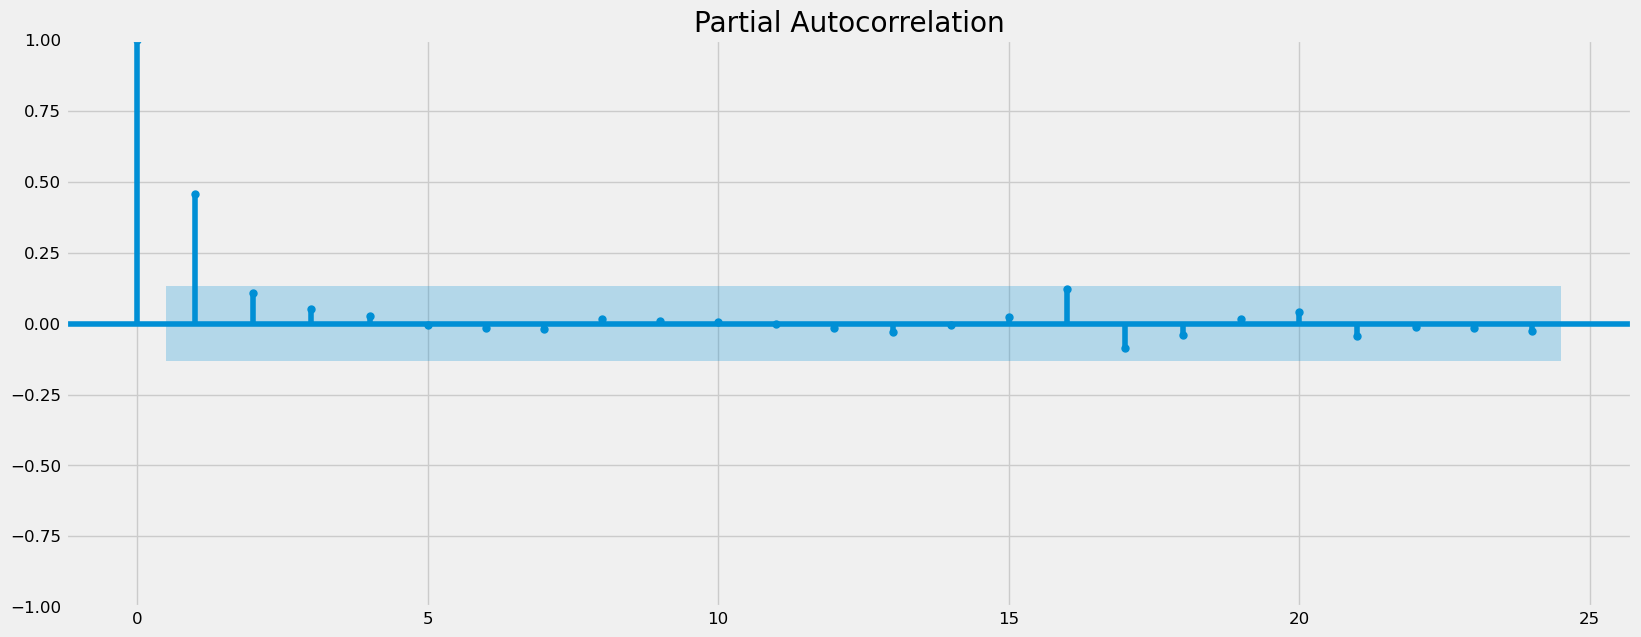

<Figure size 3000x3000 with 0 Axes>

In [15]:
# Plot partial autocorrelations to determine parameter p

plot_pacf(data)
plt.figure(figsize=(10,10), dpi=300)
plt.show()


Will pick 2 AR terms to compensate for the highest (and only) two autocorrelations. p = 2

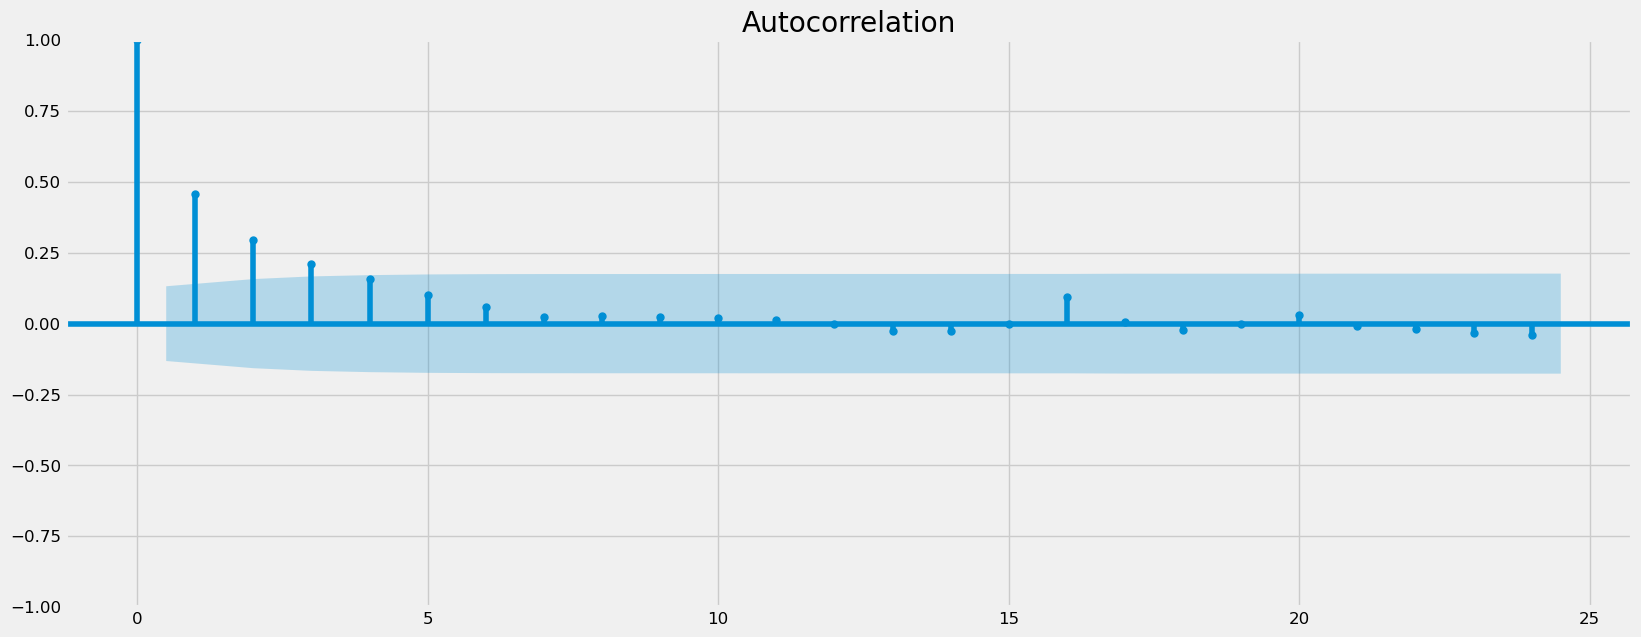

<Figure size 1500x500 with 0 Axes>

In [16]:
# Plot autocorrelations to determine parameter q

plot_acf(data)
plt.figure(figsize=(15,5), dpi=100)
plt.show()

There are significant autocorrelations (4). I will take a conservative approach and attempt q=2.

# Splitting the data

In [17]:
data.shape

(221, 1)

In [80]:
# Set the display option to show all rows
pd.set_option('display.max_rows', None)

In [97]:
data.tail(100)

,count_ts_songs
datetime,
2021-12-18,3
2021-12-25,3
2022-01-01,3
2022-01-08,3
2022-01-15,2
2022-01-22,2
2022-01-29,2
2022-02-05,2
2022-02-12,2


In [126]:
# identify point to include

index_value_to_print = '2022-12-31'
print("\nSpecific Index Value:")
print(data.index.get_loc(index_value_to_print))


Specific Index Value:
175


In [127]:
# split the data

train = data['count_ts_songs'][:175]
test = data['count_ts_songs'][174:]

In [128]:
test.shape

(47,)

In [129]:
test.head()a

datetime
2022-12-24    2
2022-12-31    2
2023-01-07    2
2023-01-14    4
2023-01-21    3
Name: count_ts_songs, dtype: int64

In [130]:
train.shape

(175,)

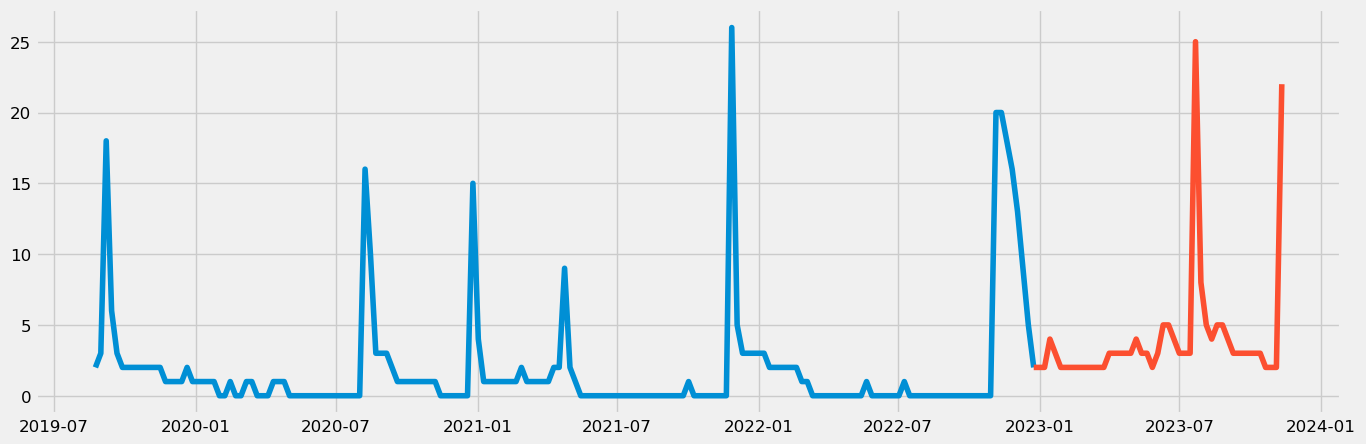

In [131]:
# Plot both sets in order to see the split

plt.figure(figsize=(15,5), dpi=100)
plt.plot(train)
plt.plot(test)

In [132]:
test.shape

(47,)

# Running and Fitting the Model

In [133]:
from statsmodels.tsa.api import ARIMA

In [134]:
model = ARIMA(train, order=(2, 0, 2))
model=model.fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:         count_ts_songs   No. Observations:                  175
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -462.761
Date:                Sat, 23 Dec 2023   AIC                            937.523
Time:                        17:49:02   BIC                            956.511
Sample:                    08-24-2019   HQIC                           945.225
                         - 12-24-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4479      0.170      8.533      0.000       1.115       1.781
ar.L1          1.7825      0.094     18.873      0.000       1.597       1.968
ar.L2         -0.8288      0.096     -8.672      0.000      -1.016      -0.642
ma.L1         -1.3873      1.261     -1.100      0.271      -3.859       1.084
ma.L2          0.3875      0.474      0.818      0.413      -0.541       1.316
sigma2        11.3499     14.037      0.809      0.419     -16.162      38.862
===================================================================================
Ljung-Box (L1) (Q):                   0.14   Jarque-Bera (JB):              3703.71
Prob(Q):                              0.71   Prob(JB):                         0.00
Heteroskedasticity (H):               2.21   Skew:                             4.07
Prob(H) (two-sided):                  0.00   Kurtosis:                        24.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Look into residuals

<function matplotlib.pyplot.show(close=None, block=None)>

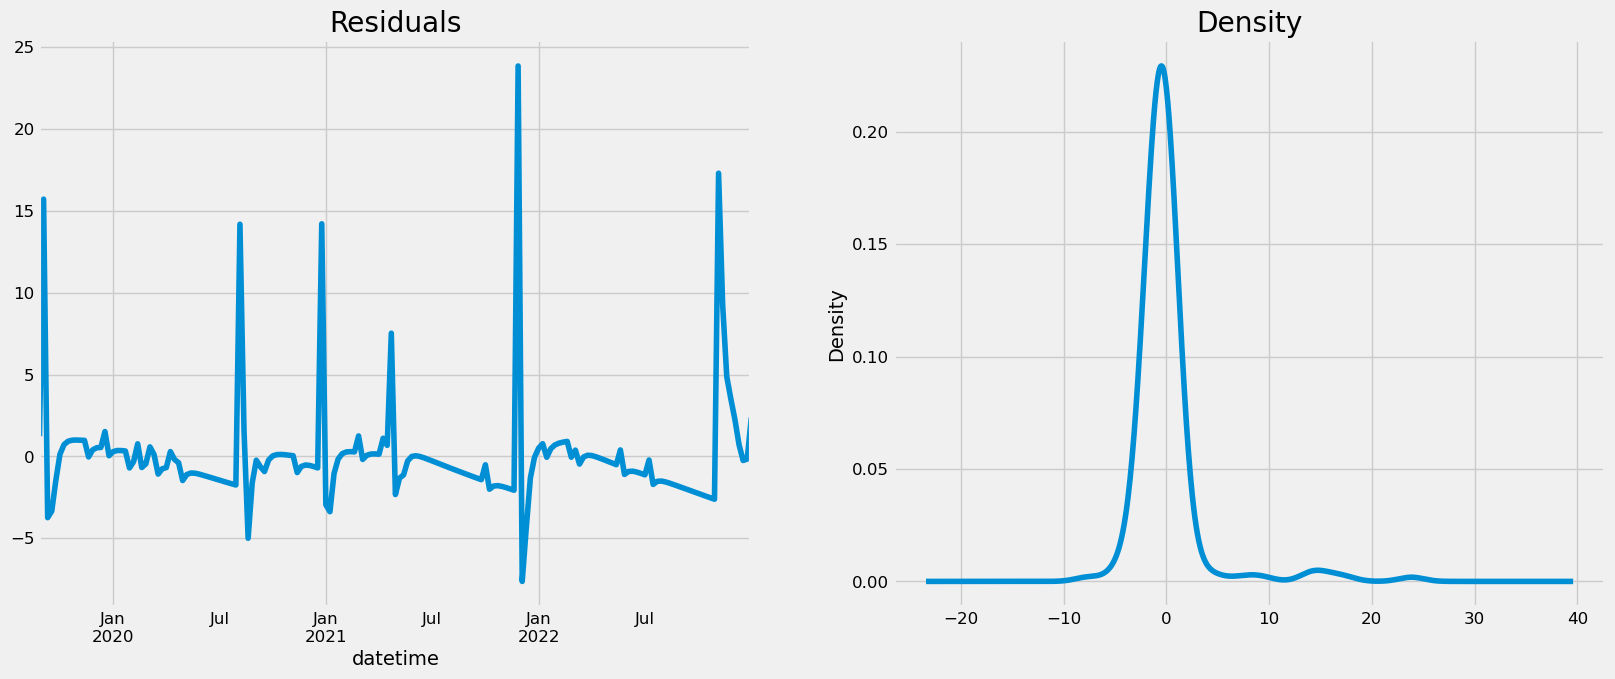

In [135]:
residuals = model_fit.resid[1:]
fig, ax = plt.subplots(1,2)
residuals.plot(title='Residuals', ax=ax[0])
residuals.plot(title='Density', kind='kde', ax=ax[1])
plt.show

Risiduals look fairly random. Density appears normally distributed with mean around 0.

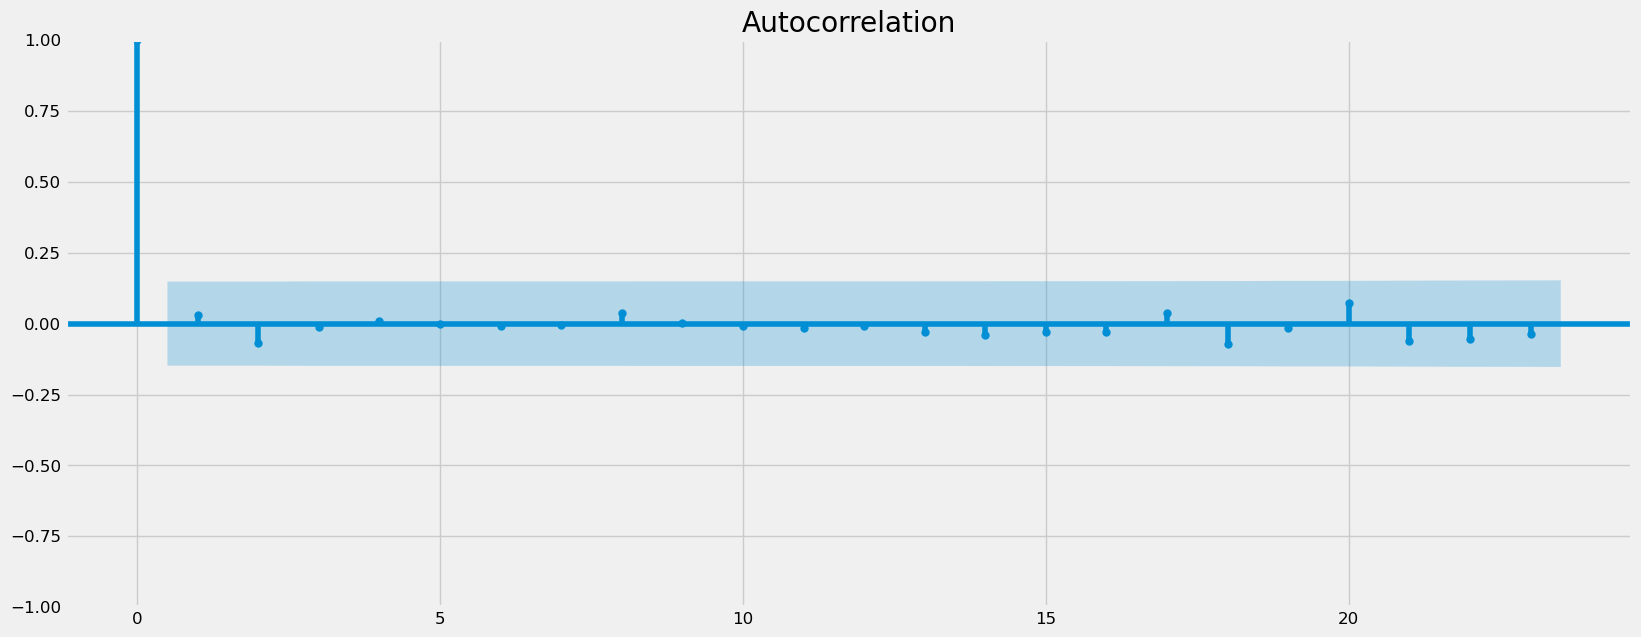

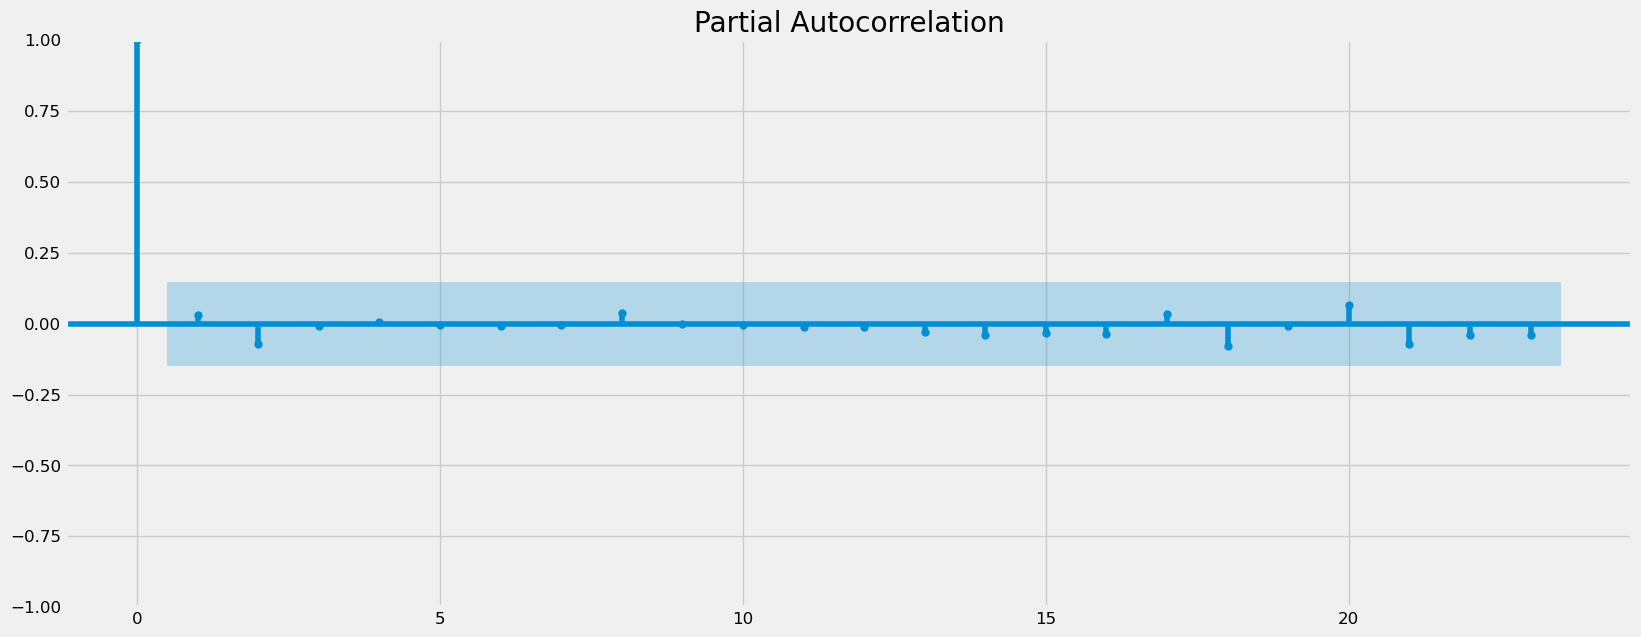

In [136]:
acf_res = plot_acf(residuals)

pacf_res = plot_pacf(residuals)

Risiduals are close to white noise beceause of lack of negative significant bars. 

                               SARIMAX Results                                
Dep. Variable:         count_ts_songs   No. Observations:                  175
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -462.761
Date:                Sat, 23 Dec 2023   AIC                            937.523
Time:                        17:49:23   BIC                            956.511
Sample:                    08-24-2019   HQIC                           945.225
                         - 12-24-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4479      0.170      8.533      0.000       1.115       1.781
ar.L1          1.7825      0.094     18.873      0.000       1.597       1.968
ar.L2         -0.8288      0.096     -8.672      0.0

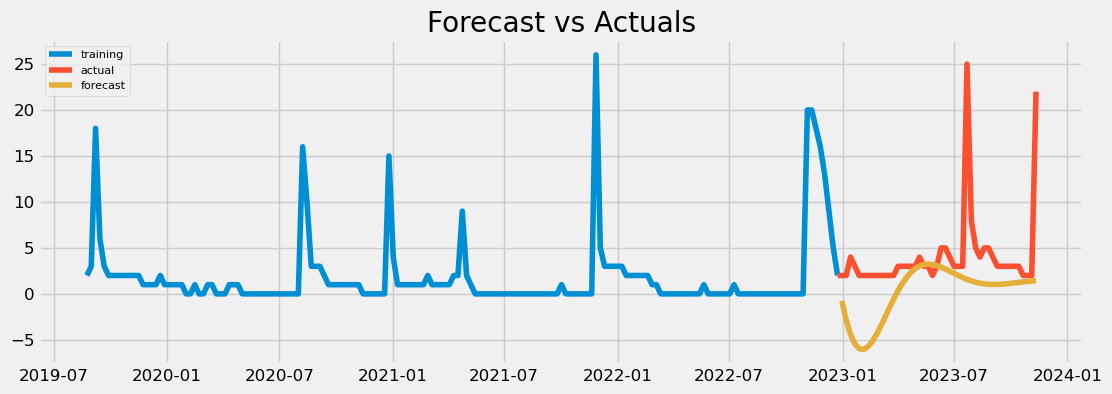

In [137]:
model = ARIMA(train, order=(2,0,2)) 
fitted = model.fit()
print(fitted.summary())

# Forecast
forecast_steps = len(test)
fc = fitted.forecast(steps=forecast_steps, alpha=0.05)  # Forecasted values

# Compute standard errors
se = np.sqrt(fitted.forecast(steps=forecast_steps, alpha=0.05)[1])  # Standard errors

# Compute confidence interval
conf = 1.96 * se  # 95% confidence interval (for a two-sided interval)

# Create forecasted and confidence interval series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(fc - conf, index=test.index)
upper_series = pd.Series(fc + conf, index=test.index)

# Plot
plt.figure(figsize=(12, 4), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.05)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

Observations: 
- The forecast underestimates values
- Some of the actual data does cross the forecast
- AR values are stat significant
- MA values are not: will shift those values in next iteration
- As noted with tutor- not showing a confidence interval

                               SARIMAX Results                                
Dep. Variable:         count_ts_songs   No. Observations:                  201
Model:                 ARIMA(1, 0, 2)   Log Likelihood                -523.157
Date:                Sat, 23 Dec 2023   AIC                           1056.313
Time:                        17:39:07   BIC                           1072.830
Sample:                    08-24-2019   HQIC                          1062.997
                         - 06-24-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0055      1.678      1.195      0.232      -1.284       5.295
ar.L1          0.6673      0.261      2.557      0.011       0.156       1.179
ma.L1         -0.1726      0.257     -0.673      0.5

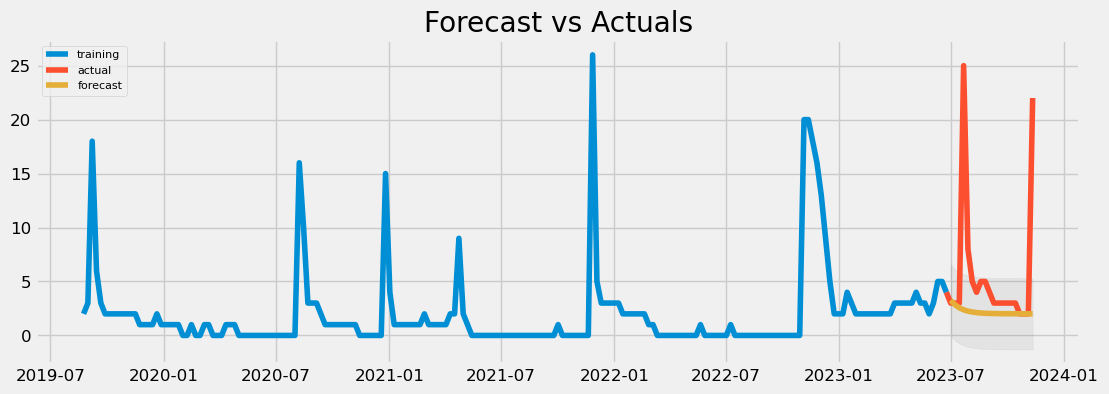

In [112]:
model = ARIMA(train, order=(1,0,2)) 
fitted = model.fit()
print(fitted.summary())

# Forecast
forecast_steps = len(test)
fc = fitted.forecast(steps=forecast_steps, alpha=0.05)  # Forecasted values

# Compute standard errors
se = np.sqrt(fitted.forecast(steps=forecast_steps, alpha=0.05)[1])  # Standard errors

# Compute confidence interval
conf = 1.96 * se  # 95% confidence interval (for a two-sided interval)

# Create forecasted and confidence interval series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(fc - conf, index=test.index)
upper_series = pd.Series(fc + conf, index=test.index)

# Plot
plt.figure(figsize=(12, 4), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.05)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

- Although the forecasted values are closer to the actual values, less are stat signficant due to p-values
- Appears I went the wrong direction in iteration

                               SARIMAX Results                                
Dep. Variable:         count_ts_songs   No. Observations:                  156
Model:                 ARIMA(2, 0, 1)   Log Likelihood                -397.751
Date:                Sat, 23 Dec 2023   AIC                            805.501
Time:                        17:36:59   BIC                            820.750
Sample:                    08-24-2019   HQIC                           811.695
                         - 08-13-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4287      1.143      1.250      0.211      -0.812       3.669
ar.L1          0.9009      3.879      0.232      0.816      -6.702       8.504
ar.L2         -0.1420      1.314     -0.108      0.9

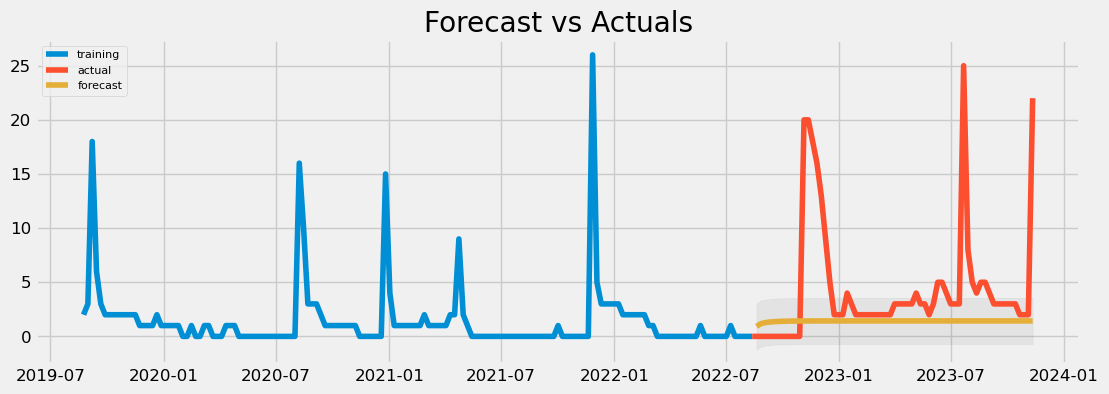

In [95]:
model = ARIMA(train, order=(2,0,1)) 
fitted = model.fit()
print(fitted.summary())

# Forecast
forecast_steps = len(test)
fc = fitted.forecast(steps=forecast_steps, alpha=0.05)  # Forecasted values

# Compute standard errors
se = np.sqrt(fitted.forecast(steps=forecast_steps, alpha=0.05)[1])  # Standard errors

# Compute confidence interval
conf = 1.96 * se  # 95% confidence interval (for a two-sided interval)

# Create forecasted and confidence interval series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(fc - conf, index=test.index)
upper_series = pd.Series(fc + conf, index=test.index)

# Plot
plt.figure(figsize=(12, 4), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.05)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

- P-values got worse, once again

                               SARIMAX Results                                
Dep. Variable:         count_ts_songs   No. Observations:                  176
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -469.651
Date:                Sat, 23 Dec 2023   AIC                            945.303
Time:                        17:34:21   BIC                            954.814
Sample:                    08-24-2019   HQIC                           949.161
                         - 12-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8597      1.848      1.006      0.314      -1.763       5.482
ar.L1          0.5351      0.058      9.176      0.000       0.421       0.649
sigma2        12.1477      1.169     10.394      0.0

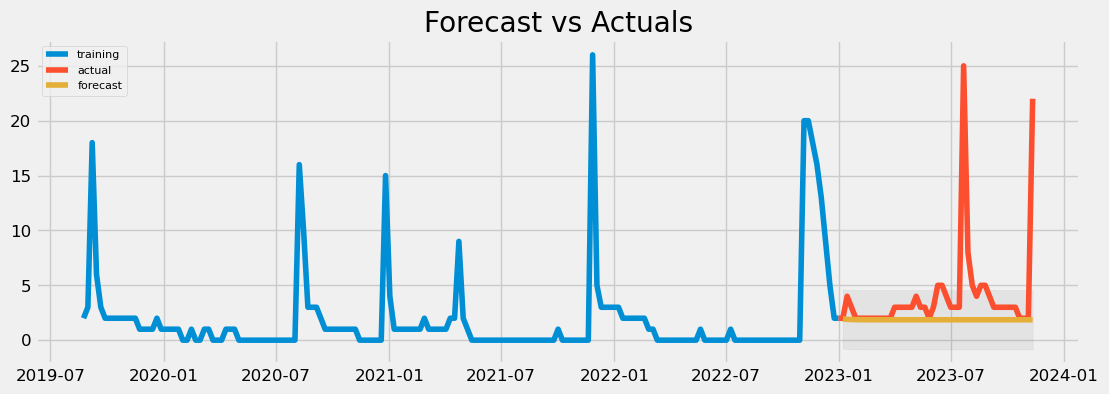

In [78]:
model = ARIMA(train, order=(1,0,0)) 
fitted = model.fit()
print(fitted.summary())

# Forecast
forecast_steps = len(test)
fc = fitted.forecast(steps=forecast_steps, alpha=0.05)  # Forecasted values

# Compute standard errors
se = np.sqrt(fitted.forecast(steps=forecast_steps, alpha=0.05)[1])  # Standard errors

# Compute confidence interval
conf = 1.96 * se  # 95% confidence interval (for a two-sided interval)

# Create forecasted and confidence interval series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(fc - conf, index=test.index)
upper_series = pd.Series(fc + conf, index=test.index)

# Plot
plt.figure(figsize=(12, 4), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.05)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

### Observations

-Current AR values are all significant
-None of my MA values are significant
-Forecast barely overlaps and show no

Attempt Differencing to see if helps ARIMA

In [113]:
data_diff = data- data.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [114]:
# Remove the missing values

data_diff.dropna(inplace = True) 

In [115]:
data_diff.head()

,count_ts_songs
datetime,
2019-08-31,1.0
2019-09-07,15.0
2019-09-14,-12.0
2019-09-21,-3.0
2019-09-28,-1.0


In [116]:
data_diff.columns

Index(['count_ts_songs'], dtype='object')

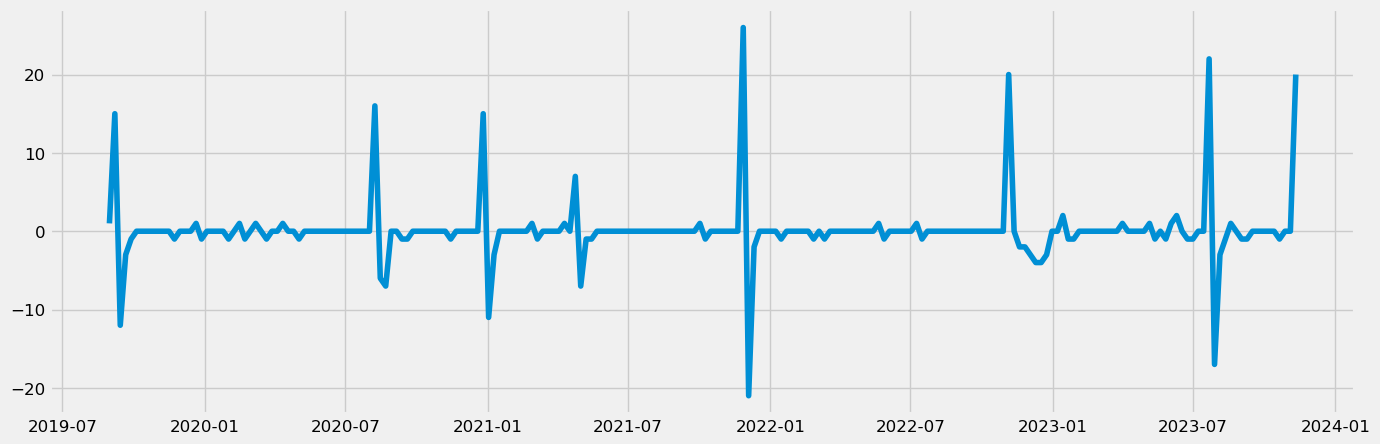

In [117]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

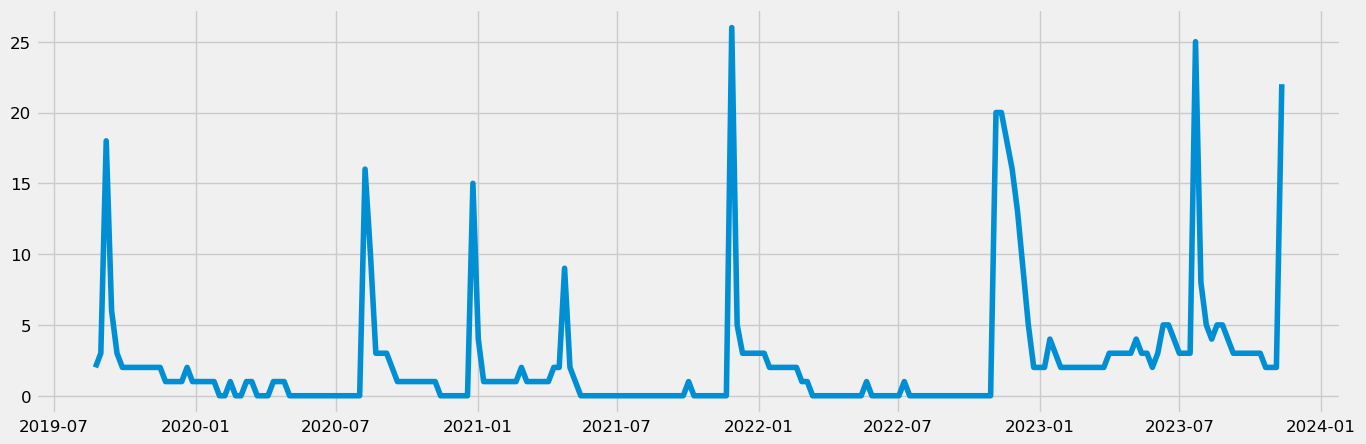

In [118]:
# Compare with original 

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data)

In [121]:
from statsmodels.tsa.stattools import adfuller 

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data_diff['count_ts_songs'])

Dickey-Fuller Stationarity test:
Test Statistic                -1.130874e+01
p-value                        1.254241e-20
Number of Lags Used            2.000000e+00
Number of Observations Used    2.170000e+02
Critical Value (1%)           -3.460849e+00
Critical Value (5%)           -2.874953e+00
Critical Value (10%)          -2.573919e+00
dtype: float64


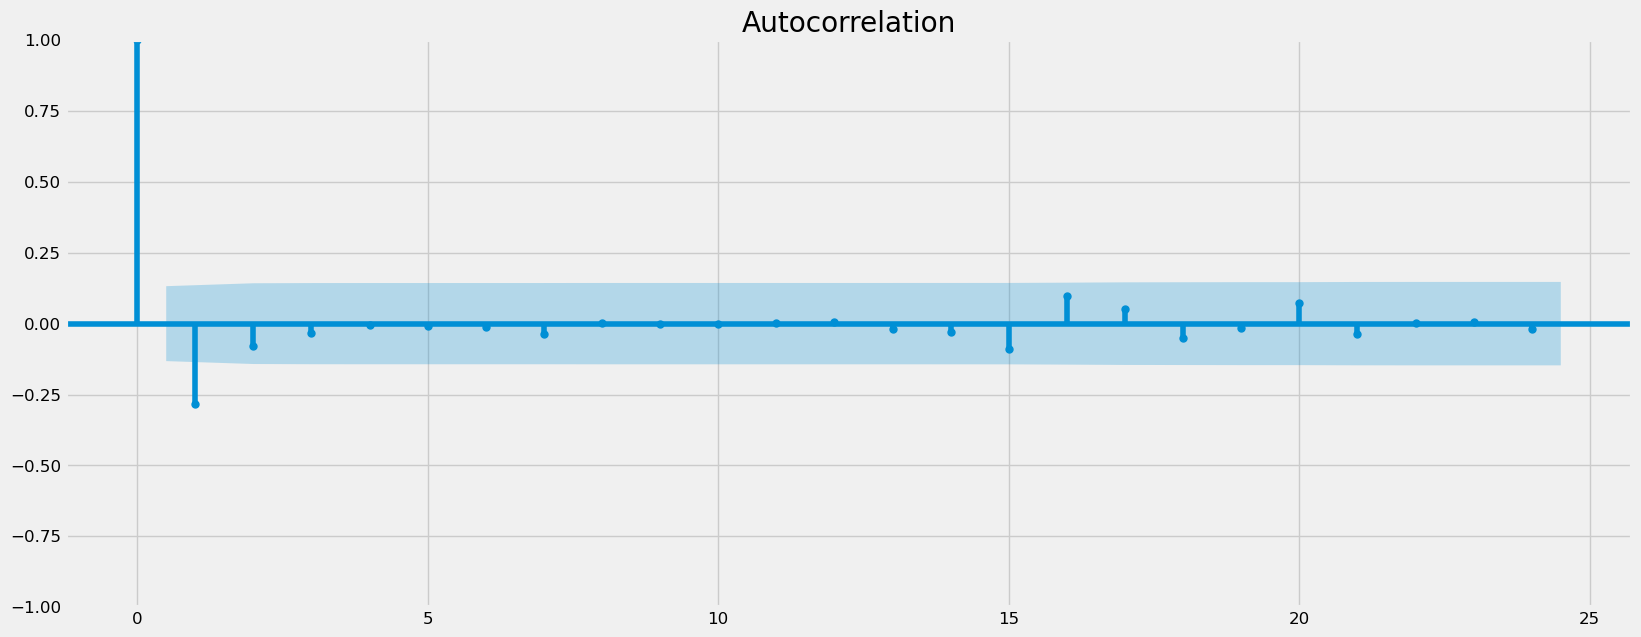

In [122]:
plot_acf(data_diff)
plt.show()

# Re-attempt ARIMA with d=1

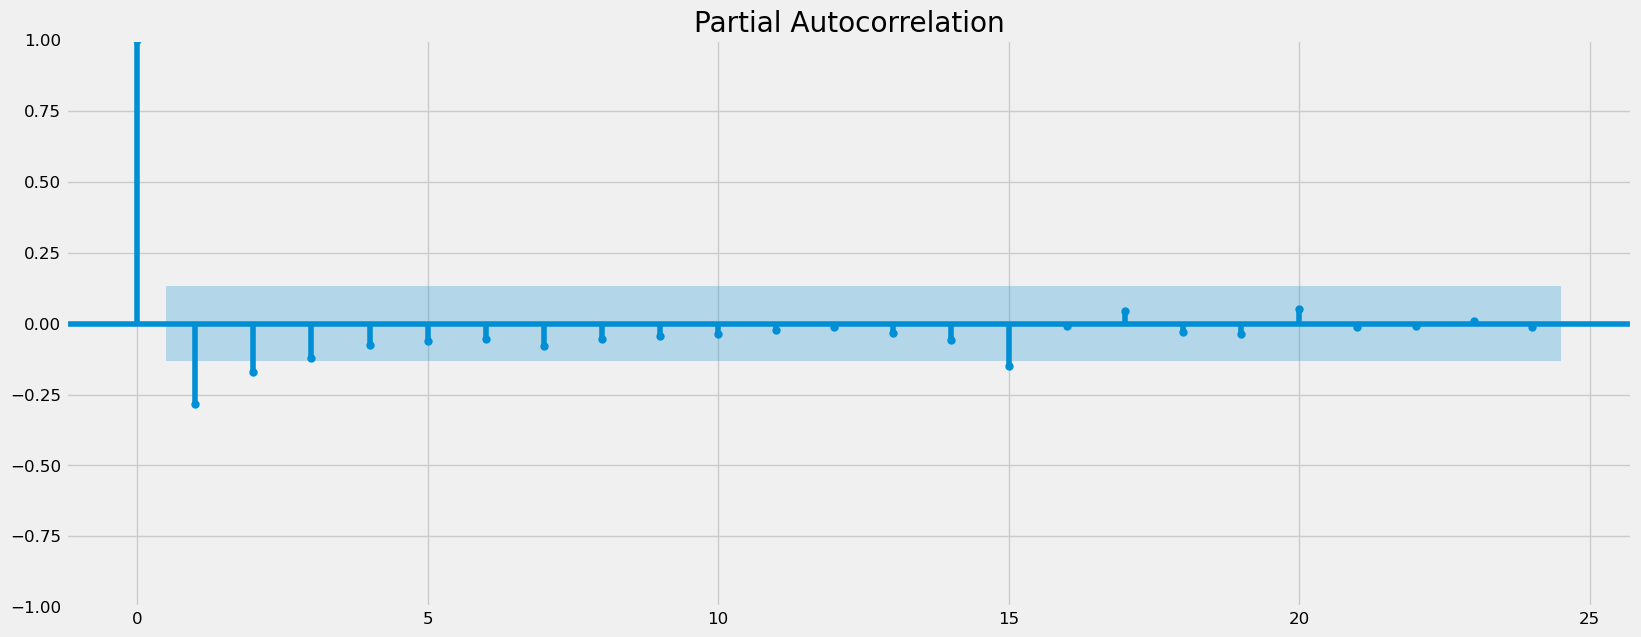

<Figure size 3000x3000 with 0 Axes>

In [123]:
# Plot partial autocorrelations to determine parameter p

plot_pacf(data_diff)
plt.figure(figsize=(10,10), dpi=300)
plt.show()


4 statistically significant partial autocorrelations, 1 positive and 3 (less sig) negative 

- Will choose p value of 2

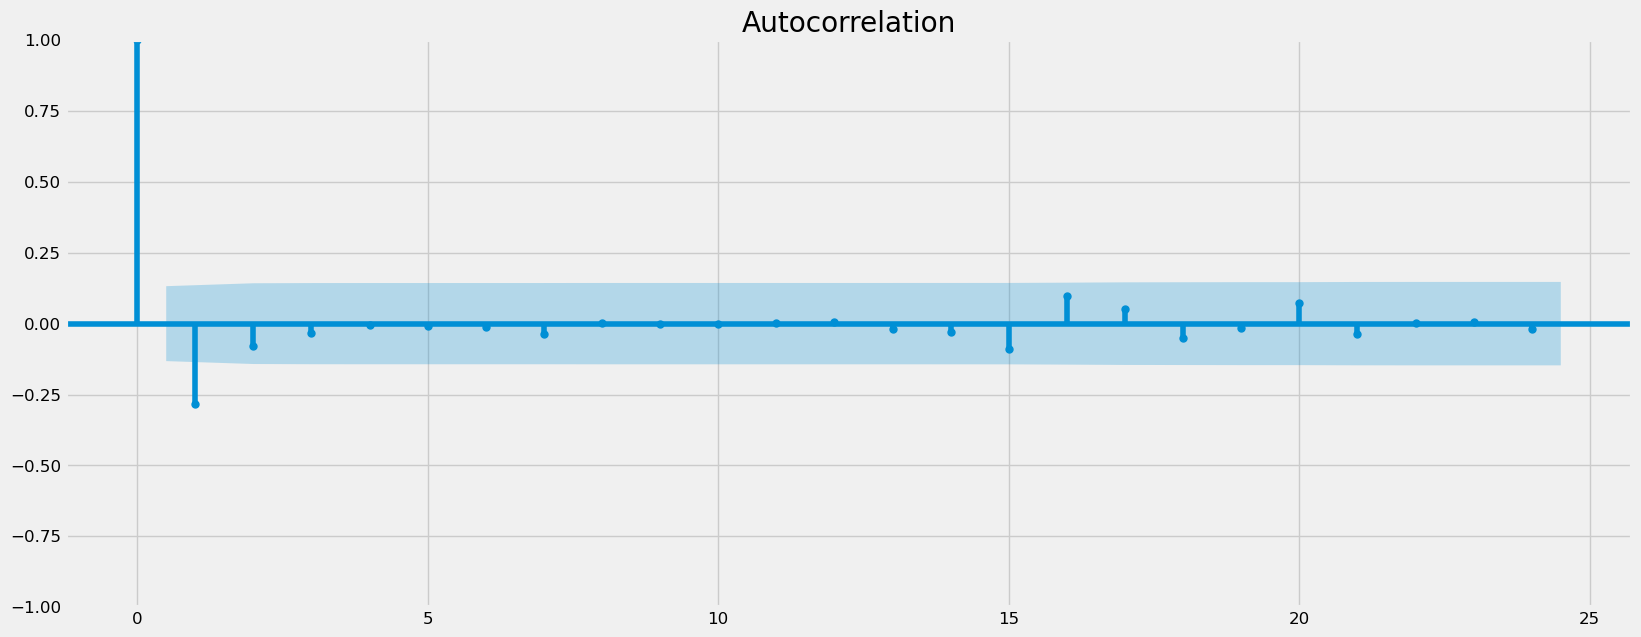

<Figure size 1500x500 with 0 Axes>

In [124]:
# Plot autocorrelations to determine parameter q

plot_acf(data_diff)
plt.figure(figsize=(15,5), dpi=100)
plt.show()

2 statistically significant autocorrelations, one positive and one negative

will start with q=1

                               SARIMAX Results                                
Dep. Variable:         count_ts_songs   No. Observations:                  175
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -466.494
Date:                Sat, 23 Dec 2023   AIC                            940.988
Time:                        17:49:44   BIC                            953.624
Sample:                    08-24-2019   HQIC                           946.114
                         - 12-24-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4987      0.049     10.126      0.000       0.402       0.595
ar.L2          0.0850      0.076      1.122      0.262      -0.064       0.234
ma.L1         -0.9999      5.627     -0.178      0.8

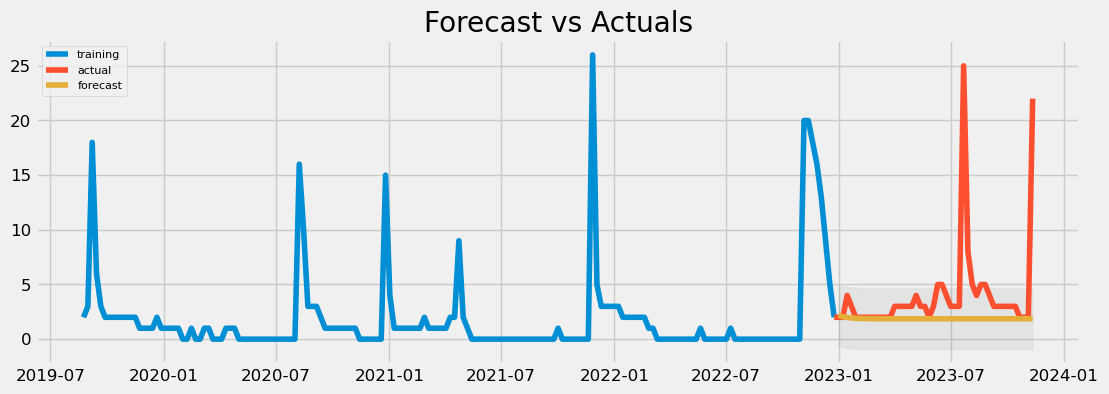

In [138]:
model = ARIMA(train, order=(2,1,1)) 
fitted = model.fit()
print(fitted.summary())

# Forecast
forecast_steps = len(test)
fc = fitted.forecast(steps=forecast_steps, alpha=0.05)  # Forecasted values

# Compute standard errors
se = np.sqrt(fitted.forecast(steps=forecast_steps, alpha=0.05)[1])  # Standard errors

# Compute confidence interval
conf = 1.96 * se  # 95% confidence interval (for a two-sided interval)

# Create forecasted and confidence interval series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(fc - conf, index=test.index)
upper_series = pd.Series(fc + conf, index=test.index)

# Plot
plt.figure(figsize=(12, 4), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.05)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

So far, scores are worse than before differencing. Will try another iteration. 

                               SARIMAX Results                                
Dep. Variable:         count_ts_songs   No. Observations:                  175
Model:                 ARIMA(2, 1, 0)   Log Likelihood                -476.494
Date:                Sat, 23 Dec 2023   AIC                            958.989
Time:                        17:53:47   BIC                            968.466
Sample:                    08-24-2019   HQIC                           962.833
                         - 12-24-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3571      0.037     -9.575      0.000      -0.430      -0.284
ar.L2         -0.2156      0.064     -3.368      0.001      -0.341      -0.090
sigma2        13.9851      0.445     31.420      0.0

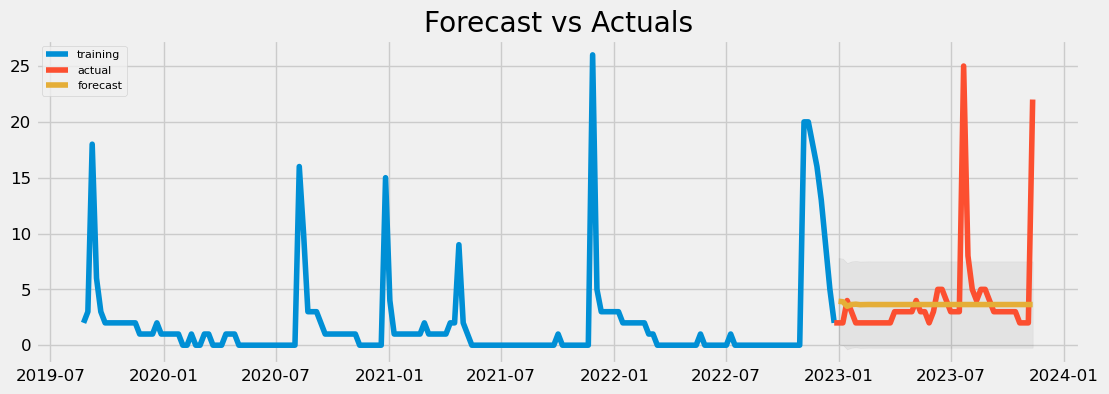

In [144]:
model = ARIMA(train, order=(2,1,0)) 
fitted = model.fit()
print(fitted.summary())

# Forecast
forecast_steps = len(test)
fc = fitted.forecast(steps=forecast_steps, alpha=0.05)  # Forecasted values

# Compute standard errors
se = np.sqrt(fitted.forecast(steps=forecast_steps, alpha=0.05)[1])  # Standard errors

# Compute confidence interval
conf = 1.96 * se  # 95% confidence interval (for a two-sided interval)

# Create forecasted and confidence interval series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(fc - conf, index=test.index)
upper_series = pd.Series(fc + conf, index=test.index)

# Plot
plt.figure(figsize=(12, 4), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.05)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

                               SARIMAX Results                                
Dep. Variable:         count_ts_songs   No. Observations:                  175
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -466.494
Date:                Sat, 23 Dec 2023   AIC                            940.988
Time:                        17:55:05   BIC                            953.624
Sample:                    08-24-2019   HQIC                           946.114
                         - 12-24-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4987      0.049     10.126      0.000       0.402       0.595
ar.L2          0.0850      0.076      1.122      0.262      -0.064       0.234
ma.L1         -0.9999      5.627     -0.178      0.8

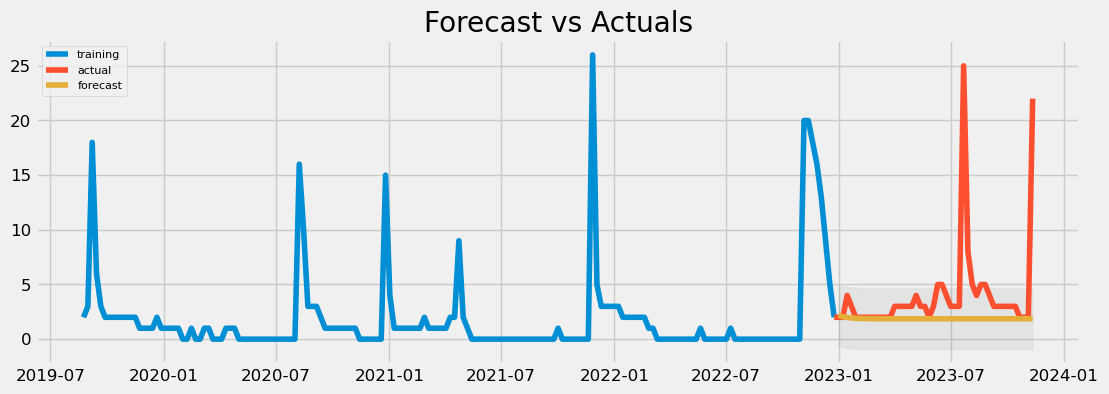

In [150]:
model = ARIMA(train, order=(2,1,1))  # Replace p, d, and q with appropriate values
fitted = model.fit()
print(fitted.summary())

# Forecast
forecast_steps = len(test)
fc = fitted.forecast(steps=forecast_steps, alpha=0.05)  # Forecasted values

# Compute standard errors
se = np.sqrt(fitted.forecast(steps=forecast_steps, alpha=0.05)[1])  # Standard errors

# Compute confidence interval
conf = 1.96 * se  # 95% confidence interval (for a two-sided interval)

# Create forecasted and confidence interval series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(fc - conf, index=test.index)
upper_series = pd.Series(fc + conf, index=test.index)

# Plot
plt.figure(figsize=(12, 4), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.05)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()